### Lawful Permanent Resident of the U.S. 2016
* **Historical data of various immigration statistics yearbooks can be retrieved [here](https://www.dhs.gov/immigration-statistics/yearbook)**
* **2016 Yearbook of Immigration Statistics can be retrieve [here](https://www.dhs.gov/immigration-statistics/yearbook/2016#*)**

The basic motivation for this assignment is try to create a nice visualization package to demonstrate various aspects of green card statistics in the U.S. Therefore, the fundamental research question is: what is the reality of permanent residence immigration in the U.S.? Starting from this driving question, various subordinate aspects of the data are included, such as:
* Gross historical trend.
* Categorization by residence region before immigration.
* Relation between personal income and propensity to immigration in different regions.

**Note that this program is by no means entirely comprehensive. The demonstrated aspects below are merely selected based on the author's sole judgments. In fact, the author will grudgingly admit that statistics published by the Pew Research Center on unauthorized immigration in the U.S. are hesitantly excluded, in order to avoid controversial grading **

### The first dataset is the historical data from 1820 to 2016
* This dataset can be accessed [here](https://www.dhs.gov/immigration-statistics/yearbook/2016/table1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import ipywidgets as wg
import plotly.offline as ply
import plotly.graph_objs as go
ply.offline.init_notebook_mode(connected=True)
%matplotlib notebook

In [2]:
df1 = pd.read_excel('raw data files/immigration yearbook 2016 table 01.xls',
                    skiprows=3,skipfooter=2,
                    dtype={'Number':'float64','Number.1':'float64','Number.2':'float64'})
subdf1 = df1[['Year','Number']]
subdf2 = df1[['Year.1','Number.1']].rename(columns={'Year.1':'Year','Number.1':'Number'})
subdf3 = df1[['Year.2','Number.2']].rename(columns={'Year.2':'Year','Number.2':'Number'})
subdf4 = df1[['Year.3','Number.3']].rename(columns={'Year.3':'Year','Number.3':'Number'})
subdf4 = subdf4.dropna()
subdf4['Number'] = subdf4['Number'].astype('float64')
subdf4['Year'] = subdf4['Year'].astype('str').str[:4]
df1 = pd.merge(subdf1,subdf2,how='outer',left_on=['Year','Number'],right_on=['Year','Number'])
df1 = pd.merge(df1,subdf3,how='outer',left_on=['Year','Number'],right_on=['Year','Number'])
df1 = pd.concat([df1,subdf4])
df1['Year'] = df1['Year'].astype('str')
df1['Number'] = df1['Number'].astype('int64')
df1['Year'] = pd.to_datetime(df1['Year'])
df1['Year'] = df1['Year'].apply(lambda x:x.strftime('%Y'))
df1 = df1.set_index('Year')

### This interactive cell enable an user to choose a year range
### and plot a line graph of green card admission per year during that range.

In [3]:
line1 = go.Scatter(
    x = [year for year in range(1820,2016+1)],
    y = df1['Number'],
    line = dict(width = 4,color = '#0080ff'))
data = [line1]

layout = go.Layout(
    title='Lawful Permanent Resident Admission in the U.S. per year from 1820 to 2016',
    titlefont=dict(family='Helvetica',size=20,color='#000000'),
    autosize=False,
    width=1079,
    height=667,
    xaxis=dict(
        showgrid=False,
        rangeselector=dict(
            buttons=list([dict(count=1,label='1Y',step='year',stepmode='backward')])),
        rangeslider=dict(),type=None),
    yaxis=dict(
        showgrid=False)
    )

figure = go.Figure(data=data, layout=layout)
ply.iplot(figure);

### This interactive cell enanble an user to input a year range
### and plot a bar graph of green card admission per year during that range.

In [4]:
bar1 = go.Bar(
    x = [year for year in range(1820,2016+1)],
    y = df1['Number'],
    marker=dict(color = '#0080ff'))
data = [bar1]


layout = go.Layout(
    title='Lawful Permanent Resident Admission in the U.S. per year from 1820 to 2016',
    titlefont=dict(family='Helvetica',size=20,color='#000000'),
    autosize=False,
    width=1079,
    height=667,
    bargap=0.5,
    xaxis=dict(
        showgrid=False,
        tickfont=dict(family='Helvetica',size=20,color='#000000'),
        rangeselector=dict(
            buttons=list([dict(count=1,label='1Y',step='year',stepmode='backward')])),
        rangeslider=dict(),type=None),
    yaxis=dict(
        showgrid=False,
        tickfont=dict(family='Helvetica',size=20,color='#000000'))
    )

fig = go.Figure(data=data, layout=layout)
ply.iplot(fig)

### This interactive cell enable an user to input a year 
### and output the green card admission in the U.S. of that year.

In [5]:
def choose_year (year):
    print('The number of green card admission in',year,
          'is','{0:,.0f}'.format(df1.loc[str(year)][0]),'people.')

input1 = wg.BoundedIntText(value=np.median([1820,2016]),min=1820,max=2016,step=1,
                           description='Enter a year:',disabled=False,
                          style={'description_width': 'initial'})

wg.interact(choose_year,year=input1);

interactive(children=(BoundedIntText(value=1918, description='Enter a year:', max=2016, min=1820, style=Descri…

### The second dataset is categorization by regions of residence from 1820 to 2016
* This dataset can be accessed [here](https://www.dhs.gov/immigration-statistics/yearbook/2016/table2)
* Note that categorization by region of birth seems to be only available from 2007 to 2016

In [6]:
df2 = pd.read_excel('raw data files/immigration yearbook 2016 table 02.xls',
                   skiprows=3,skipfooter=24)
df2 = df2.rename(columns={'Region and country of last residence 1':'Region'})
df2['Region'] = [i for i in df2['Region'].str.replace('\d+', '')]
df2['Region'] = [i for i in df2['Region'].str.replace(',', '')]
df2['Region'] = [i.strip() for i in df2['Region']]
df2 = df2.set_index('Region').sort_index()
df2.columns = [str(i)[:4]+'s' for i in list(df2.columns)]
df2 = df2.rename(columns={'2010s':'2010','2011s':'2011','2012s':'2012',
                         '2013s':'2013','2014s':'2014','2015s':'2015','2016s':'2016'})
df2['2010s'] = np.sum(df2[df2.columns[-7:]],axis=1)
df2 = df2.drop(df2.columns[-8:-1],axis=1)

### This interactive cell enable an user to choose a region from a dropdown menu
### and plot a bar chart of green card admission per decade from that region

In [7]:
def choose_region (region):
    bar1 = go.Bar(
    x = [year for year in df2.columns],
    y = df2.loc[region],
    marker=dict(color = '#0080ff'))
    data = [bar1]

    layout = go.Layout(
        title='Green Card Admission from {} to the U.S. per year'.format(region),
        titlefont=dict(family='Helvetica',size=20,color='#000000'),
        autosize=False,
        width=1079,
        height=667,
        bargap=0.5,
        xaxis=dict(
            showgrid=False,
            tickfont=dict(family='Helvetica',size=20,color='#000000'),
            tickangle=-45),
        yaxis=dict(
            showgrid=False,
            tickfont=dict(family='Helvetica',size=20,color='#000000')),
        )

    fig = go.Figure(data=data, layout=layout)
    ply.iplot(fig)

input1 = wg.Dropdown(options=df2.index,value='China',description='Choose a region:',
                     layout=wg.Layout(width='50%'),disabled=False,
                     style={'description_width': 'initial'})

print('Countries, continents, and other non-state regions are included in the dropdown menu.')
wg.interact(choose_region,region=input1);

Countries, continents, and other non-state regions are included in the dropdown menu.


interactive(children=(Dropdown(description='Choose a region:', index=16, layout=Layout(width='50%'), options=(…

### The third dataset is average real GDP per capita by regions
* This dataset can be accessed [here](https://www.rug.nl/ggdc/historicaldevelopment/maddison/releases/maddison-project-database-2018)
* Values are in 2011 USD.

The author of the dataset request the following to be shown:
***
When using these data (for whatever purpose), please make the following reference:
Maddison Project Database, version 2018. Bolt, Jutta, Robert Inklaar, Herman de Jong and Jan Luiten van Zanden (2018), 
“Rebasing ‘Maddison’: new income comparisons and the shape of long-run economic development” 
Maddison Project Working Paper, nr. 10, available for download at www.ggdc.net/maddison .
Please refer to www.ggdc.net/maddison for documentation and explanation of the data series!

In [8]:
df3 = pd.read_csv('raw data files/average real gdp per capita across countries and regions.csv')
df3.columns = ['Region','Code','Year','Real GDP per capita']
df3 = df3.drop('Code',axis=1)
df3 = df3[df3['Region'].str.contains('Europe|Asia|Latin America|Africa')]
df3['Region'] = df3['Region'].str.replace(' Maddison definition','')

### The following operation creates four datasets of real GDP per capita per decade from 1950s to 2010s for four continents, Africa, Latin America, Asia, and Europe.
* Note that Europe and Latin America do have data available prior to 1950s, whereas Afica and Asia do not. Therefore, all data prior to 1950s are excluded for the purpose of consistency.

In [9]:
Africa = df3[df3['Region'] == 'Africa']
Africa = Africa.drop(['Region'],axis=1).set_index('Year').T
Africa.columns = pd.to_datetime(Africa.columns,format='%Y')
Africa1 = Africa[Africa.columns[:-7]].resample('10YS',axis=1).sum()
Africa2 = Africa[Africa.columns[-7:]]
Africa2['2010s'] = Africa2.sum(axis=1)
Africa2 = Africa2.drop(Africa2.columns[:-1],axis=1)
Africa1['2010'] = Africa2
Africa = Africa1
Africa.columns = Africa.columns.map(lambda x:x.strftime('%Ys'))
Africa = Africa.rename(index={'Real GDP per capita':'Africa real GDP per capita'})

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [10]:
America = df3[df3['Region'] == 'Latin America']
America = America.drop(['Region'],axis=1).set_index('Year').T
America.columns = pd.to_datetime(America.columns,format='%Y')
America1 = America[America.columns[2:-7]].resample('10YS',axis=1).sum()
America2 = America[America.columns[-7:]]
America2['2010s'] = America2.sum(axis=1)
America2 = America2.drop(America2.columns[:-1],axis=1)
America1['2010'] = America2
America = America1
America.columns = America.columns.map(lambda x:x.strftime('%Ys'))
America = America.rename(index={'Real GDP per capita':'America real GDP per capita'})
America = America[America.columns[5:]]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [11]:
Asia = df3[df3['Region'].str.contains('Asia')]

East_Asia = Asia[Asia['Region'] == 'East Asia']
East_Asia = East_Asia[['Year','Real GDP per capita']].rename(
    columns={'Real GDP per capita':'East Asia gdp'})
East_Asia = East_Asia.set_index('Year').T
East_Asia.columns = pd.to_datetime(East_Asia.columns,format='%Y')
East_Asia1 = East_Asia[East_Asia.columns[5:-7]].resample('10YS',axis=1).sum()
East_Asia2 = East_Asia[East_Asia.columns[-7:]]
East_Asia2['2010s'] = East_Asia2.sum(axis=1)
East_Asia2 = East_Asia2.drop(East_Asia2.columns[:-1],axis=1)
East_Asia1['2010'] = East_Asia2
East_Asia = East_Asia1
East_Asia.columns = East_Asia.columns.map(lambda x:x.strftime('%Ys'))

Western_Asia = Asia[Asia['Region'] == 'Western Asia']
Western_Asia = Western_Asia[['Year','Real GDP per capita']].rename(
    columns={'Real GDP per capita':'Western Asia gdp'})
Western_Asia = Western_Asia.set_index('Year').T
Western_Asia.columns = pd.to_datetime(Western_Asia.columns,format='%Y')
Western_Asia1 = Western_Asia[Western_Asia.columns[:-7]].resample('10YS',axis=1).sum()
Western_Asia2 = Western_Asia[Western_Asia.columns[-7:]]
Western_Asia2['2010s'] = Western_Asia2.sum(axis=1)
Western_Asia2 = Western_Asia2.drop(Western_Asia2.columns[:-1],axis=1)
Western_Asia1['2010'] = Western_Asia2
Western_Asia = Western_Asia1
Western_Asia.columns = Western_Asia.columns.map(lambda x:x.strftime('%Ys'))

Asia = East_Asia.append(Western_Asia)
Asia.loc['Asia real GDP per capita'] = Asia.loc['East Asia gdp'] + Asia.loc['Western Asia gdp']
Asia = Asia.drop(['East Asia gdp','Western Asia gdp'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [12]:
Europe = df3[df3['Region'].str.contains('Europe')]

Eastern_Europe = Europe[Europe['Region'] == 'Eastern Europe']
Eastern_Europe = Eastern_Europe[['Year','Real GDP per capita']].rename(
    columns={'Real GDP per capita':'Eastern Europe gdp'})
Eastern_Europe = Eastern_Europe.set_index('Year').T
Eastern_Europe.columns = pd.to_datetime(Eastern_Europe.columns,format='%Y')
Eastern_Europe1 = Eastern_Europe[Eastern_Europe.columns[4:-7]].resample('10YS',axis=1).sum()
Eastern_Europe2 = Eastern_Europe[Eastern_Europe.columns[-7:]]
Eastern_Europe2['2010s'] = Eastern_Europe2.sum(axis=1)
Eastern_Europe2 = Eastern_Europe2.drop(Eastern_Europe2.columns[:-1],axis=1)
Eastern_Europe1['2010'] = Eastern_Europe2
Eastern_Europe = Eastern_Europe1
Eastern_Europe.columns = Eastern_Europe.columns.map(lambda x:x.strftime('%Ys'))
Eastern_Europe

Western_Europe = Europe[Europe['Region'] == 'Western Europe']
Western_Europe = Western_Europe[['Year','Real GDP per capita']].rename(
    columns={'Real GDP per capita':'Western Europe gdp'})
Western_Europe = Western_Europe.set_index('Year').T
Western_Europe.columns = pd.to_datetime(Western_Europe.columns,format='%Y')
Western_Europe1 = Western_Europe[Western_Europe.columns[80:-7]].resample('10YS',axis=1).sum()
Western_Europe2 = Western_Europe[Western_Europe.columns[-7:]]
Western_Europe2['2010s'] = Western_Europe2.sum(axis=1)
Western_Europe2 = Western_Europe2.drop(Western_Europe2.columns[:-1],axis=1)
Western_Europe1['2010'] = Western_Europe2
Western_Europe = Western_Europe1
Western_Europe.columns = Western_Europe.columns.map(lambda x:x.strftime('%Ys'))

Europe = Eastern_Europe.append(Western_Europe)
Europe.loc['Europe real GDP per capita'] = Europe.loc['Eastern Europe gdp'] + Europe.loc['Western Europe gdp']
Europe = Europe.drop(['Eastern Europe gdp','Western Europe gdp'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



### The fourth dataset is to combine each continent's green card addmission per decade and real gdp per capita per decade together and explore their relationship.
* Note that data prior to 1950s are excluded for the purpose of consistency.

In [13]:
df4 = df2[df2.index.isin(['Africa','America','Asia','Europe'])]
df4 = df4[df4.columns[13:]]
df4.index = [i + ' Green Card' for i in df4.index]
for i in [Africa,America,Asia,Europe]:
    df4.loc[i.index[0]] = i.iloc[0]

df4 = df4.pct_change(axis=1)
df4 = df4.round(2)

### This visualization create four subplots with the growth rate of green card admission and real gdp per capita in 10 year intervals of four continents from 1960s to 2010s.
### This subplot visualization is meant to examine the relationship between the growth of income and the propensity for immigration to the U.S. 
* Note that, although the growth of income seems to be positively related to the growth of green card admission in Africa and Europe, this relation does not seem to be conspicuous in America and Asia.

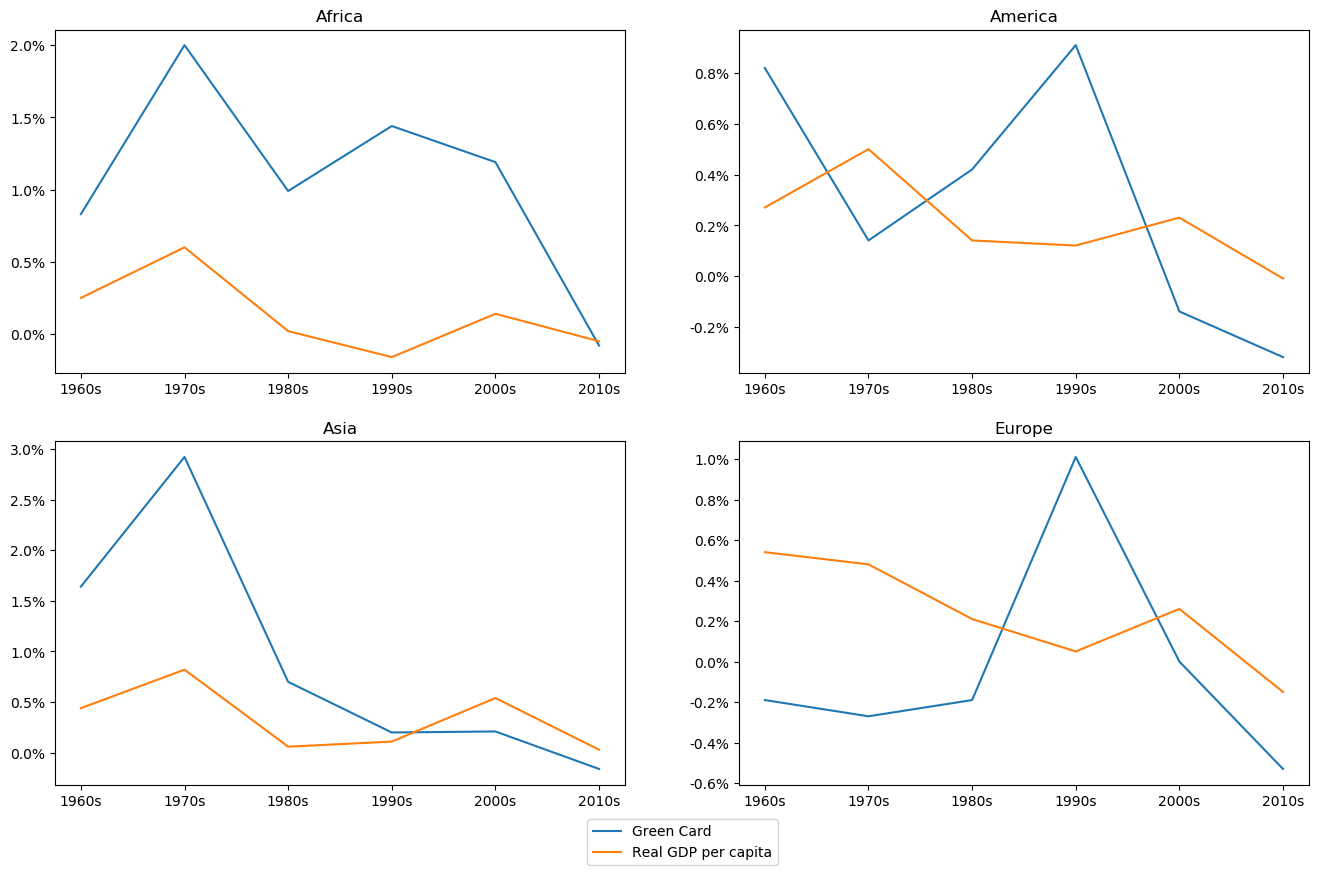

In [14]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import plotly.plotly as py
import plotly.tools as tls

figure = plt.figure(figsize=(16.18,10),dpi=100)

gs = gridspec.GridSpec(2,2)
subplot1 = figure.add_subplot(gs[0,0])
subplot1.plot(df4.loc['Africa Green Card'])
subplot1.plot(df4.loc['Africa real GDP per capita'])
subplot1.set_yticklabels(['{:.1f}%'.format(y) for y in plt.gca().get_yticks()])
subplot1.set_title('Africa')

gs = gridspec.GridSpec(2,2)
subplot2 = figure.add_subplot(gs[0,1])
subplot2.plot(df4.loc['America Green Card'])
subplot2.plot(df4.loc['America real GDP per capita'])
subplot2.set_yticklabels(['{:.1f}%'.format(y) for y in plt.gca().get_yticks()])
subplot2.set_title('America')

gs = gridspec.GridSpec(2,2)
subplot3 = figure.add_subplot(gs[1,0])
subplot3.plot(df4.loc['Asia Green Card'])
subplot3.plot(df4.loc['Asia real GDP per capita'])
subplot3.set_yticklabels(['{:.1f}%'.format(y) for y in plt.gca().get_yticks()])
subplot3.set_title('Asia')

gs = gridspec.GridSpec(2,2)
subplot4 = figure.add_subplot(gs[1,1])
subplot4.plot(df4.loc['Europe Green Card'],label='Green Card')
subplot4.plot(df4.loc['Europe real GDP per capita'],label='Real GDP per capita')
subplot4.set_yticklabels(['{:.1f}%'.format(y) for y in plt.gca().get_yticks()])
subplot4.set_title('Europe')
subplot4.legend(bbox_to_anchor=(0.08,-0.08), loc="upper right");